In [4]:
import os
os.chdir("modulo/")

In [5]:
import numpy as np 
import pandas as pd 
import metrics
import optimization
import matplotlib.pyplot as plt

In [6]:
os.chdir("..")

In [74]:
import numpy as np

def minimize_vol(rp, e_r, cov, eps = 0.0001, alpha= 0.01):
    n =  e_r.shape[0]
    dc = np.hstack((np.ones((n,1)), e_r))
    #Primeiro Chute
    w = (np.ones(n)*1/n).reshape(n, 1)#Carteira
    w = w/sum(w)
    l = -1*(np.linalg.inv(dc.T@dc)@dc.T@cov@w)#Multiplicadores de Lagrange
    
    #Calculando grad(c(x)) 
    #Criando a Matriz A
    def generate_A(Sigma, dc, n, delta1 = 0, delta2 =0.0):
        a = np.hstack([2*Sigma+delta1*np.eye(len(w)), dc])
        b = np.hstack([dc.T, np.zeros((2,2))-delta2*np.eye(2)])
        return np.vstack((a, b))
    
    #Criando o vetor b.
    def generate_b(Sigma, dc, e_r, l, w, rp):
        a = 2*Sigma@w + dc@l
        b = np.ones((1,n))@w - 1
        c = e_r.T@w - rp
        return -1*np.vstack((a, b, c))
    
    def grad(w, cov, l, dc):
        return (2*cov@w+ dc@l)
    
    A = generate_A(cov, dc, n)
    
    i = 0
    while np.sum(grad(w, cov, l, dc)) > 2*eps:                                               #while max(np.abs((grad(w,cov, l, dc)))) > eps:
        b = generate_b(cov, dc, e_r, l, w, rp)
        #print("b: ",b, "\n")
        dx = np.linalg.inv(A)@b
        #print("dx: ", dx, "\n")
        dw, dl = dx[0:n][:], dx[n:n+2][:]
        w = w + alpha*dw
        #print("w: \n", w, "\n")
        l = l + alpha*dl
        
    return w

<AxesSubplot:xlabel='Vol'>

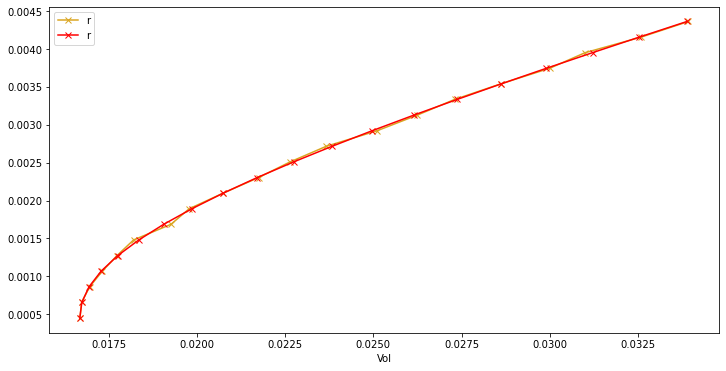

In [75]:
dados = pd.read_csv("dadoss.csv", decimal= ",", delimiter =";")
dados = dados[["SAPR4", "ELET6", "VIVT3","MGLU3"]]
retornos = dados.pct_change().dropna()
cov = np.array(retornos.cov())
e_r = np.array(retornos.mean()).reshape(4, 1)


returns = np.linspace(min(e_r), max(e_r), 20)
carteiras_pi = np.array([np.round(minimize_vol(r, e_r, cov), 2) for r in returns])
carteiras_scipy = np.array([minimize_vol(r, e_r, cov).reshape((4, 1)) for r in returns])

vol1 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_pi]
dic1 = {"Vol": vol1, "r": returns.reshape(returns.shape[0])}
df1 = pd.DataFrame(dic1)
ax = df1.plot(x="Vol", y="r", marker = "x", color="goldenrod", figsize=(12,6))

vol2 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_scipy]
dic2 = {"Vol": vol2, "r": returns.reshape(returns.shape[0])}
df2 = pd.DataFrame(dic2)
df2.plot(x="Vol", y="r", marker = "x", color="red", ax = ax)

In [62]:
dados

,SAPR4,ELET6,VIVT3,MGLU3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,3.51,26.13,32.19,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.53,26.00,32.77,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.51,25.79,32.68,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.67,25.83,31.48,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.73,25.76,32.23,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,4.31,37.44,43.66,21.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1064,4.21,36.69,42.95,20.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1065,4.23,36.77,42.94,20.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066,4.31,36.56,43.40,20.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
dados = pd.read_csv("dados_ajustados.csv", decimal= ",", delimiter =";", index_col="Data")
retornos = dados.pct_change().dropna()
cov = np.array(retornos.cov())
e_r = np.array(retornos.mean()).reshape((retornos.shape[1], 1))

In [47]:
returns = np.linspace(min(e_r), max(e_r), 10)
carteiras_pi = np.array([minimize_vol(r, e_r, cov) for r in returns])
carteiras_scipy = np.array([minimize_vol2(r, e_r, cov).reshape((4, 1)) for r in returns])

vol1 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_pi]
dic1 = {"Vol": vol1, "r": returns.reshape(returns.shape[0])}
df1 = pd.DataFrame(dic1)
ax = df1.plot(x="Vol", y="r", marker = "x", color="goldenrod", figsize=(12,6))

vol2 = [float(np.sqrt(w.T@cov@w)) for w in carteiras_scipy]
dic2 = {"Vol": vol2, "r": returns.reshape(returns.shape[0])}
df2 = pd.DataFrame(dic2)
df2.plot(x="Vol", y="r", marker = "x", color="red", ax = ax)

[[ 1.00000000e+00  2.02945089e-03]
 [ 1.00000000e+00  1.29368596e-03]
 [ 1.00000000e+00  1.83168289e-04]
 [ 1.00000000e+00 -1.01272721e-04]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

In [48]:
carteiras_pi

array([[[0.  ],
        [1.  ]],

       [[0.11],
        [0.89]],

       [[0.22],
        [0.78]],

       [[0.33],
        [0.67]],

       [[0.44],
        [0.56]],

       [[0.56],
        [0.44]],

       [[0.67],
        [0.33]],

       [[0.78],
        [0.22]],

       [[0.89],
        [0.11]],

       [[1.  ],
        [0.  ]]])

In [49]:
carteiras_pi

array([[[0.  ],
        [1.  ]],

       [[0.11],
        [0.89]],

       [[0.22],
        [0.78]],

       [[0.33],
        [0.67]],

       [[0.44],
        [0.56]],

       [[0.56],
        [0.44]],

       [[0.67],
        [0.33]],

       [[0.78],
        [0.22]],

       [[0.89],
        [0.11]],

       [[1.  ],
        [0.  ]]])

In [50]:
from scipy.optimize import minimize

def minimize_vol2(target_return, er, cov):
    """
    target_ret -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),)*n
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - weights.T@er
    }
    
    results = minimize(lambda weights, cov: weights.T@cov@weights, init_guess,
                       args=(cov,), method="SLSQP",
                       options={"disp":False},
                       constraints=(return_is_target, weights_sum_to_1),
                       bounds=bounds
                      )
    return results.x
    

In [43]:
e_r

array([[ 0.00202945],
       [ 0.00129369],
       [ 0.00018317],
       [-0.00010127]])

In [15]:
cov

array([[2.11616664e-04, 2.15415257e-05],
       [2.15415257e-05, 2.21610254e-04]])

In [ ]:
def minimize_vol(e_r, cov, rp, eps = 0.0001, sim = 100000):
